In [2]:
!pip install -q lucid>=0.2.3

In [3]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
def addV(x, y):
  gl.glColor3f(0.4, 0.6, 1)
  gl.glPointSize(3)
  gl.glBegin(gl.GL_POINTS)
  gl.glVertex2f(x / 400, y / 300)
  gl.glEnd()

In [ ]:
def draw(x, y, x_add, y_add):
  addV(x+x_add, y+y_add)
  addV(y+x_add, x+y_add)
  addV(y+x_add, -x+y_add)
  addV(x+x_add, -y+y_add)
  addV(-x+x_add, -y+y_add)
  addV(-y+x_add, -x+y_add)
  addV(-y+x_add, x+y_add)
  addV(-x+x_add, y+y_add)

In [ ]:
import math
import random
def midpoint(x, y, r, angle):
  half = r / 2
  d = 1.25 - r
  x_def = 0
  y_def = r
  while(x_def < y_def):
    if(d < 0):
      d = d + (2*x_def) + 3
      x_def += 1
    else:
      d = d + (2*x_def) - (2*y_def) + 5
      x_def += 1
      y_def -= 1  
    
    # Outer circle
    draw(x_def, y_def, x, y)
    # Inner circles
    for i in range(0, 360, angle):
      draw(x_def / 2, y_def / 2, x + (half * math.cos(i * math.pi / 180)), y + (half * math.sin(i * math.pi / 180)))

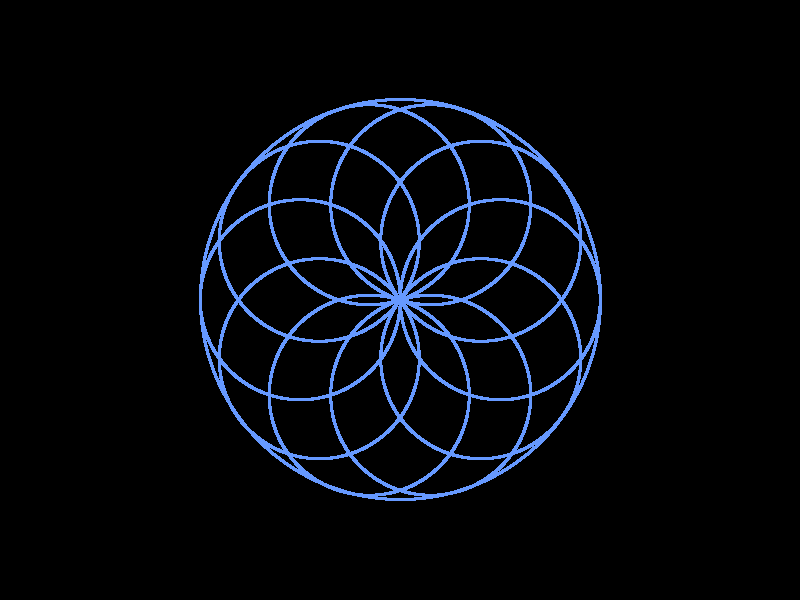

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

x = 0
y = 0
r = 200
n = 10
angle = 360 // n
midpoint(x, y, r, angle)


from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))